# 5.2 워드클라우드

### 5.2.2 해시태그 데이터 불러오기

In [3]:
# 예제 5-14 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('c:/work2/1_crawling_raw.xlsx')
raw_total['tags'] [:3]

0                                                   []
1    ['#제주선채향', '#선채향>⠀요즘', '#제주선채향', '#제주선채향◾️', '...
2                                                   []
Name: tags, dtype: object

In [4]:
# 예제 5-15 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

### 5.2.3 해시태그 출현 빈도 집계

In [5]:
# 예제 5-16 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [6]:
# 예제 5-17 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('#제주맛집', 2892),
 ('#제주여행', 2830),
 ('#제주관광', 2827),
 ('#제주도맛집', 1748),
 ('#제주도', 1697),
 ('#제주', 1399),
 ('#제주도여행', 1116),
 ('#서귀포맛집', 1048),
 ('#서귀포', 791),
 ('#제주도가볼만한곳', 697),
 ('#제주핫플레이스', 693),
 ('#jeju', 683),
 ('#일상', 541),
 ('#제주도민', 528),
 ('#제주카페', 515),
 ('#제주맛집추천', 504),
 ('#협재맛집', 500),
 ('', 479),
 ('#성산일출봉', 470),
 ('#제주흑돼지맛집', 469),
 ('#제주핫플', 466),
 ('#제주도그램', 452),
 ('#제주살이', 451),
 ('#제주도흑돼지맛집', 445),
 ('#제주도흑돼지', 445),
 ('#제주반영구', 439),
 ('#제주도관광', 439),
 ('#제주가볼만한곳', 434),
 ('#제주눈썹문신', 433),
 ('#선팔', 427),
 ('#서귀포눈썹문신', 419),
 ('#제주시', 415),
 ('#여행스타그램', 412),
 ('#눈썹문신', 400),
 ('#제주흑돼지', 400),
 ('#반영구', 399),
 ('#섭지코지', 397),
 ('#제주자연눈썹', 396),
 ('#제주속눈썹', 396),
 ('#서귀포남자눈썹문신', 394),
 ('#서귀포자연눈썹', 394),
 ('#제주남자눈썹문신', 394),
 ('#서귀포속눈썹', 394),
 ('#서귀포반영구', 394),
 ('#서귀포흑돼지맛집', 376),
 ('#성산일출봉맛집', 374),
 ('#여행', 371),
 ('#서귀포흑돼지', 366),
 ('#제주메이크업', 358),
 ('#섭지코지맛집', 357)]

In [7]:
# 예제 5-18 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#제주맛집', 2892),
 ('#제주여행', 2830),
 ('#제주관광', 2827),
 ('#제주도맛집', 1748),
 ('#제주', 1399),
 ('#제주도여행', 1116),
 ('#서귀포맛집', 1048),
 ('#서귀포', 791),
 ('#제주도가볼만한곳', 697),
 ('#제주핫플레이스', 693),
 ('#제주도민', 528),
 ('#제주카페', 515),
 ('#제주맛집추천', 504),
 ('#협재맛집', 500),
 ('', 479),
 ('#성산일출봉', 470),
 ('#제주흑돼지맛집', 469),
 ('#제주핫플', 466),
 ('#제주도그램', 452),
 ('#제주살이', 451),
 ('#제주도흑돼지맛집', 445),
 ('#제주도흑돼지', 445),
 ('#제주반영구', 439),
 ('#제주도관광', 439),
 ('#제주가볼만한곳', 434),
 ('#제주시', 415),
 ('#여행스타그램', 412),
 ('#눈썹문신', 400),
 ('#제주흑돼지', 400),
 ('#섭지코지', 397),
 ('#제주속눈썹', 396),
 ('#서귀포남자눈썹문신', 394),
 ('#서귀포자연눈썹', 394),
 ('#제주남자눈썹문신', 394),
 ('#서귀포속눈썹', 394),
 ('#서귀포반영구', 394),
 ('#서귀포흑돼지맛집', 376),
 ('#성산일출봉맛집', 374),
 ('#여행', 371),
 ('#서귀포흑돼지', 366),
 ('#제주메이크업', 358),
 ('#섭지코지맛집', 357),
 ('#제주스타그램', 332),
 ('#제주서귀포맛집', 331),
 ('#제주도민맛집', 330),
 ('#제주통갈치구이', 330),
 ('#통갈치구이', 329),
 ('#카멜리아힐', 328),
 ('#제주일상', 327),
 ('#애월맛집', 315)]

### 5.2.4 막대차트로 해시태그 살펴보기

In [8]:
# 예제 5-19 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)


In [9]:
# 예제 5-20 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

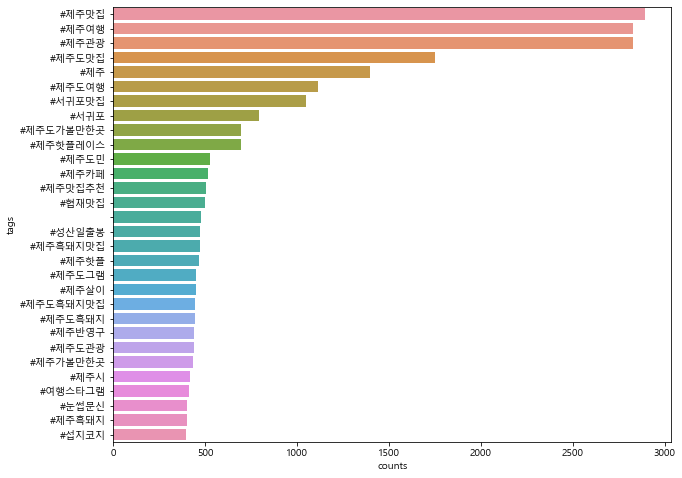

In [10]:
# 예제 5-21 막대 차트 그리기
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

### 5.2.5 워드 클라우드 그리기

In [11]:
# 예제 5-22 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud    # 에러시  ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


ModuleNotFoundError: No module named 'wordcloud'

In [12]:
# 예제 5-23 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/2_tag-wordcloud.png')  

NameError: name 'WordCloud' is not defined